In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
import numpy as np
import shap #Check version, SHAP 0.36.0
import time
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, InputLayer
from sklearn.ensemble import IsolationForest
from keras.preprocessing.sequence import TimeseriesGenerator
from yellowbrick.model_selection import learning_curve

In [2]:
from numpy.random import seed
seed(1)
tf.random.set_seed(2)

In [3]:
df_predict = pd.read_csv(r"C:/Users/Nicklas Branding/Desktop/infection_per_sweden_on_covid19.csv",encoding="latin-1")

In [4]:
df_predict.head()

,år,veckonummer,Antal_fall_vecka,Antal_fall_100000inv_vecka,Antal_fall_100000inv_14dagar,Kum_antal_fall,Kum_fall_100000inv,Antal_nyaintensivvårdade_vecka,Kum_antal_intensivvårdade,Antal_avlidna_vecka,Antal_avlidna_milj_inv_vecka,Kum_antal_avlidna,Kum_antal_avlidna_milj_inv
0,2020,6,1,0,0,1,0,0,0,0,0,0,0
1,2020,7,0,0,0,1,0,0,0,0,0,0,0
2,2020,8,0,0,0,1,0,0,0,0,0,0,0
3,2020,9,13,0,0,14,0,0,0,0,0,0,0
4,2020,10,211,2,2,225,2,3,3,0,0,0,0


In [5]:
df_predict = df_predict.drop(['Antal_fall_100000inv_vecka', 'Antal_fall_100000inv_14dagar', 'Kum_antal_fall', 'Kum_fall_100000inv', 'Antal_nyaintensivvårdade_vecka', 'Kum_antal_intensivvårdade', 'Antal_avlidna_vecka', 'Antal_avlidna_milj_inv_vecka', 'Kum_antal_avlidna', 'Kum_antal_avlidna_milj_inv','veckonummer','år'],axis=1)

In [6]:
feature = ['Antal_fall_vecka']

In [7]:
dfX_predict = df_predict[feature]
#dfX.head(48)

In [8]:
dfX_predict.shape

(101, 1)

In [9]:
mu = df_predict.mean(0)
sd = df_predict.std(0)
df_norm = (df_predict - mu) / sd
df_norm.head(3)
Y_mu_2 = np.asarray(mu[feature])
Y_sd_2 = np.asarray(sd[feature])

In [10]:
df_norm = np.asarray(df_norm)
df_norm.reshape((-1,1))

array([[-0.80600237],
       [-0.80605767],
       [-0.80605767],
       [-0.80533875],
       [-0.79438912],
       [-0.7597153 ],
       [-0.7549594 ],
       [-0.6978333 ],
       [-0.62749022],
       [-0.59923133],
       [-0.59856771],
       [-0.57362689],
       [-0.59414362],
       [-0.57639195],
       [-0.59209748],
       [-0.60371072],
       [-0.5693687 ],
       [-0.47308938],
       [-0.4121475 ],
       [-0.41491256],
       [-0.39378752],
       [-0.569424  ],
       [-0.68555644],
       [-0.71635919],
       [-0.73328134],
       [-0.72000906],
       [-0.69468113],
       [-0.69257969],
       [-0.71276461],
       [-0.73969628],
       [-0.73239652],
       [-0.71801822],
       [-0.69103125],
       [-0.64463358],
       [-0.60465084],
       [-0.5694793 ],
       [-0.49526515],
       [-0.29977554],
       [ 0.21557597],
       [ 0.59886831],
       [ 0.92591937],
       [ 0.9604826 ],
       [ 1.1604516 ],
       [ 1.23107118],
       [ 1.60678726],
       [ 1

In [11]:
training_data = df_norm[0:61]
testing_data_39 = df_norm[61:101]
testing_data_31 = df_norm[61:93]
testing_data_15 = df_norm[61:77]
testing_data_7 = df_norm[61:69]

In [12]:
look_back=2
train_genertor = TimeseriesGenerator(training_data,training_data,length=look_back,batch_size=1)
test_genertor_39 = TimeseriesGenerator(testing_data_39,testing_data_39,length=look_back,batch_size=1)
test_genertor_31 = TimeseriesGenerator(testing_data_31,testing_data_31,length=look_back,batch_size=1)
test_genertor_15 = TimeseriesGenerator(testing_data_15,testing_data_15,length=look_back,batch_size=1)
test_genertor_7 = TimeseriesGenerator(testing_data_7,testing_data_7,length=look_back,batch_size=1)
print("samples", len(train_genertor))

samples 59


In [13]:

X_test_1_sample = test_genertor_39[0]
Y_test_1_sample = testing_data_39[0:1]

X_test_2_sample = test_genertor_39[1]
Y_test_2_sample = testing_data_39[1:2]

X_test_3_sample = test_genertor_39[2]
Y_test_3_sample = testing_data_39[2:3]

X_test_4_sample = test_genertor_39[3]
Y_test_4_sample = testing_data_39[3:4]

X_test_5_sample = test_genertor_39[4]
Y_test_5_sample = testing_data_39[4:5]

X_test_6_sample = test_genertor_39[5]
Y_test_6_sample = testing_data_39[5:6]

X_test_7_sample = test_genertor_39[6]
Y_test_7_sample = testing_data_39[6:7]

X_test_8_sample = test_genertor_39[7]
Y_test_8_sample = testing_data_39[7:8]

X_test_9_sample = test_genertor_39[8]
Y_test_9_sample = testing_data_39[8:9]

X_test_10_sample = test_genertor_39[9]
Y_test_10_sample = testing_data_39[9:10]

X_test_11_sample = test_genertor_39[10]
Y_test_11_sample = testing_data_39[10:11]

X_test_12_sample = test_genertor_39[11]
Y_test_12_sample = testing_data_39[11:12]

X_test_13_sample = test_genertor_39[12]
Y_test_13_sample = testing_data_39[12:13]

X_test_14_sample = test_genertor_39[13]
Y_test_14_sample = testing_data_39[13:14]

X_test_15_sample = test_genertor_39[14]
Y_test_15_sample = testing_data_39[14:15]

X_test_16_sample = test_genertor_39[15]
Y_test_16_sample = testing_data_39[15:16]

X_test_17_sample = test_genertor_39[16]
Y_test_17_sample = testing_data_39[16:17]

X_test_18_sample = test_genertor_39[17]
Y_test_18_sample = testing_data_39[17:18]

X_test_19_sample = test_genertor_39[18]
Y_test_19_sample = testing_data_39[18:19]

X_test_20_sample = test_genertor_39[19]
Y_test_20_sample = testing_data_39[19:20]

X_test_21_sample = test_genertor_39[20]
Y_test_21_sample = testing_data_39[20:21]

X_test_22_sample = test_genertor_39[21]
Y_test_22_sample = testing_data_39[21:22]

X_test_23_sample = test_genertor_39[22]
Y_test_23_sample = testing_data_39[22:23]

X_test_24_sample = test_genertor_39[23]
Y_test_24_sample = testing_data_39[23:24]

X_test_25_sample = test_genertor_39[24]
Y_test_25_sample = testing_data_39[24:25]

X_test_26_sample = test_genertor_39[25]
Y_test_26_sample = testing_data_39[25:26]

X_test_27_sample = test_genertor_39[26]
Y_test_27_sample = testing_data_39[26:27]

X_test_28_sample = test_genertor_39[27]
Y_test_28_sample = testing_data_39[27:28]

X_test_29_sample = test_genertor_39[28]
Y_test_29_sample = testing_data_39[28:29]

X_test_30_sample = test_genertor_39[29]
Y_test_30_sample = testing_data_39[29:30]

X_test_31_sample = test_genertor_39[30]
Y_test_31_sample = testing_data_39[30:31]

X_test_32_sample = test_genertor_39[31]
Y_test_32_sample = testing_data_39[31:32]

X_test_33_sample = test_genertor_39[32]
Y_test_33_sample = testing_data_39[32:33]

X_test_34_sample = test_genertor_39[33]
Y_test_34_sample = testing_data_39[33:34]

X_test_35_sample = test_genertor_39[34]
Y_test_35_sample = testing_data_39[34:35]

X_test_36_sample = test_genertor_39[35]
Y_test_36_sample = testing_data_39[35:36]

X_test_37_sample = test_genertor_39[36]
Y_test_37_sample = testing_data_39[36:37]

X_test_38_sample = test_genertor_39[37]
Y_test_38_sample = testing_data_39[37:38]

In [1]:
## Remove outliers
#iso = IsolationForest(contamination=0.1)
#outlier_2 = iso.fit_predict(X_training)
# select all rows that are not outliers
#outliers_row2 = outlier_2 != -1
#X_training, Y_training = X_training[outliers_row2, :], Y_training[outliers_row2]

In [43]:
LSTM_model_2 = Sequential()
LSTM_model_2.add(LSTM(256,activation="relu", input_shape=(look_back,1),return_sequences=True))
LSTM_model_2.add(LSTM(126,activation="relu",return_sequences=True))
LSTM_model_2.add(LSTM(32,activation="relu",return_sequences=False))
LSTM_model_2.add(Dense(1))
LSTM_model_2.compile(optimizer = keras.optimizers.Adam(learning_rate=0.0001), loss = 'mean_squared_error')
history = LSTM_model_2.fit(train_genertor, validation_data=test_genertor_31, steps_per_epoch = 1,epochs = 1300, verbose=1)

Epoch 1/1300
1/1 [==============================] - 5s 5s/step - loss: 3.0528 - val_loss: 0.3936
Epoch 2/1300
1/1 [==============================] - 0s 65ms/step - loss: 0.1373 - val_loss: 0.3936
Epoch 3/1300
1/1 [==============================] - 0s 68ms/step - loss: 0.6316 - val_loss: 0.3935
Epoch 4/1300
1/1 [==============================] - 0s 65ms/step - loss: 0.3293 - val_loss: 0.3933
Epoch 5/1300
1/1 [==============================] - 0s 75ms/step - loss: 0.4474 - val_loss: 0.3932
Epoch 6/1300
1/1 [==============================] - 0s 77ms/step - loss: 1.6572 - val_loss: 0.3932
Epoch 7/1300
1/1 [==============================] - 0s 66ms/step - loss: 1.7289 - val_loss: 0.3931
Epoch 8/1300
1/1 [==============================] - 0s 64ms/step - loss: 0.3243 - val_loss: 0.3931
Epoch 9/1300
1/1 [==============================] - 0s 64ms/step - loss: 0.4155 - val_loss: 0.3929
Epoch 10/1300
1/1 [==============================] - 0s 64ms/step - loss: 0.4824 - val_loss: 0.3928
Epoch 11/13

1/1 [==============================] - 0s 87ms/step - loss: 0.5361 - val_loss: 0.3854
Epoch 83/1300
1/1 [==============================] - 0s 90ms/step - loss: 0.3163 - val_loss: 0.3852
Epoch 84/1300
1/1 [==============================] - 0s 90ms/step - loss: 0.5038 - val_loss: 0.3850
Epoch 85/1300
1/1 [==============================] - 0s 88ms/step - loss: 0.5242 - val_loss: 0.3848
Epoch 86/1300
1/1 [==============================] - 0s 91ms/step - loss: 0.5238 - val_loss: 0.3846
Epoch 87/1300
1/1 [==============================] - 0s 90ms/step - loss: 3.0167 - val_loss: 0.3844
Epoch 88/1300
1/1 [==============================] - 0s 89ms/step - loss: 0.2192 - val_loss: 0.3842
Epoch 89/1300
1/1 [==============================] - 0s 89ms/step - loss: 0.5337 - val_loss: 0.3840
Epoch 90/1300
1/1 [==============================] - 0s 88ms/step - loss: 1.5248 - val_loss: 0.3838
Epoch 91/1300
1/1 [==============================] - 0s 87ms/step - loss: 1.8616 - val_loss: 0.3837
Epoch 92/1300


1/1 [==============================] - 0s 139ms/step - loss: 0.2956 - val_loss: 0.3619
Epoch 164/1300
1/1 [==============================] - 0s 130ms/step - loss: 2.1078 - val_loss: 0.3614
Epoch 165/1300
1/1 [==============================] - 0s 131ms/step - loss: 0.2414 - val_loss: 0.3609
Epoch 166/1300
1/1 [==============================] - 0s 158ms/step - loss: 0.3261 - val_loss: 0.3605
Epoch 167/1300
1/1 [==============================] - 0s 131ms/step - loss: 0.0598 - val_loss: 0.3600
Epoch 168/1300
1/1 [==============================] - 0s 134ms/step - loss: 1.4638 - val_loss: 0.3597
Epoch 169/1300
1/1 [==============================] - 0s 151ms/step - loss: 0.4282 - val_loss: 0.3592
Epoch 170/1300
1/1 [==============================] - 0s 145ms/step - loss: 0.3802 - val_loss: 0.3589
Epoch 171/1300
1/1 [==============================] - 0s 161ms/step - loss: 0.3125 - val_loss: 0.3586
Epoch 172/1300
1/1 [==============================] - 0s 159ms/step - loss: 0.4314 - val_loss: 0.

Epoch 244/1300
1/1 [==============================] - 0s 68ms/step - loss: 0.4204 - val_loss: 0.3045
Epoch 245/1300
1/1 [==============================] - 0s 69ms/step - loss: 0.0865 - val_loss: 0.3036
Epoch 246/1300
1/1 [==============================] - 0s 66ms/step - loss: 0.1562 - val_loss: 0.3027
Epoch 247/1300
1/1 [==============================] - 0s 91ms/step - loss: 0.2154 - val_loss: 0.3017
Epoch 248/1300
1/1 [==============================] - 0s 70ms/step - loss: 0.2280 - val_loss: 0.3008
Epoch 249/1300
1/1 [==============================] - 0s 68ms/step - loss: 0.2364 - val_loss: 0.2998
Epoch 250/1300
1/1 [==============================] - 0s 66ms/step - loss: 0.3298 - val_loss: 0.2986
Epoch 251/1300
1/1 [==============================] - 0s 64ms/step - loss: 0.2174 - val_loss: 0.2973
Epoch 252/1300
1/1 [==============================] - 0s 65ms/step - loss: 0.3762 - val_loss: 0.2959
Epoch 253/1300
1/1 [==============================] - 0s 66ms/step - loss: 0.2351 - val_los

1/1 [==============================] - 0s 76ms/step - loss: 1.0944 - val_loss: 0.1483
Epoch 325/1300
1/1 [==============================] - 0s 80ms/step - loss: 0.2083 - val_loss: 0.1467
Epoch 326/1300
1/1 [==============================] - 0s 77ms/step - loss: 0.0253 - val_loss: 0.1451
Epoch 327/1300
1/1 [==============================] - 0s 78ms/step - loss: 0.0249 - val_loss: 0.1435
Epoch 328/1300
1/1 [==============================] - 0s 79ms/step - loss: 0.0079 - val_loss: 0.1420
Epoch 329/1300
1/1 [==============================] - 0s 77ms/step - loss: 0.0742 - val_loss: 0.1402
Epoch 330/1300
1/1 [==============================] - 0s 86ms/step - loss: 0.0413 - val_loss: 0.1384
Epoch 331/1300
1/1 [==============================] - 0s 97ms/step - loss: 0.0318 - val_loss: 0.1366
Epoch 332/1300
1/1 [==============================] - 0s 101ms/step - loss: 0.8383 - val_loss: 0.1349
Epoch 333/1300
1/1 [==============================] - 0s 82ms/step - loss: 0.0018 - val_loss: 0.1334
Epoc

1/1 [==============================] - 0s 103ms/step - loss: 1.5372e-05 - val_loss: 0.0715
Epoch 405/1300
1/1 [==============================] - 0s 96ms/step - loss: 0.8971 - val_loss: 0.0706
Epoch 406/1300
1/1 [==============================] - 0s 101ms/step - loss: 6.3648e-04 - val_loss: 0.0697
Epoch 407/1300
1/1 [==============================] - 0s 98ms/step - loss: 0.2466 - val_loss: 0.0688
Epoch 408/1300
1/1 [==============================] - 0s 95ms/step - loss: 0.0014 - val_loss: 0.0680
Epoch 409/1300
1/1 [==============================] - 0s 104ms/step - loss: 0.0013 - val_loss: 0.0672
Epoch 410/1300
1/1 [==============================] - 0s 99ms/step - loss: 0.2376 - val_loss: 0.0665
Epoch 411/1300
1/1 [==============================] - 0s 101ms/step - loss: 1.3628 - val_loss: 0.0654
Epoch 412/1300
1/1 [==============================] - 0s 87ms/step - loss: 1.0829e-04 - val_loss: 0.0644
Epoch 413/1300
1/1 [==============================] - 0s 87ms/step - loss: 0.0455 - val_lo

Epoch 484/1300
1/1 [==============================] - 0s 85ms/step - loss: 0.5664 - val_loss: 0.0602
Epoch 485/1300
1/1 [==============================] - 0s 73ms/step - loss: 2.9004e-05 - val_loss: 0.0608
Epoch 486/1300
1/1 [==============================] - 0s 88ms/step - loss: 0.0107 - val_loss: 0.0611
Epoch 487/1300
1/1 [==============================] - 0s 89ms/step - loss: 0.0163 - val_loss: 0.0611
Epoch 488/1300
1/1 [==============================] - 0s 101ms/step - loss: 0.0054 - val_loss: 0.0609
Epoch 489/1300
1/1 [==============================] - 0s 117ms/step - loss: 0.3359 - val_loss: 0.0610
Epoch 490/1300
1/1 [==============================] - 0s 112ms/step - loss: 0.0017 - val_loss: 0.0609
Epoch 491/1300
1/1 [==============================] - 0s 94ms/step - loss: 3.3317e-04 - val_loss: 0.0609
Epoch 492/1300
1/1 [==============================] - 0s 96ms/step - loss: 2.2000e-05 - val_loss: 0.0610
Epoch 493/1300
1/1 [==============================] - 0s 98ms/step - loss: 0

1/1 [==============================] - 0s 69ms/step - loss: 0.0159 - val_loss: 0.0757
Epoch 565/1300
1/1 [==============================] - 0s 70ms/step - loss: 0.4585 - val_loss: 0.0743
Epoch 566/1300
1/1 [==============================] - 0s 71ms/step - loss: 0.0026 - val_loss: 0.0732
Epoch 567/1300
1/1 [==============================] - 0s 68ms/step - loss: 0.0681 - val_loss: 0.0719
Epoch 568/1300
1/1 [==============================] - 0s 69ms/step - loss: 0.0096 - val_loss: 0.0709
Epoch 569/1300
1/1 [==============================] - 0s 69ms/step - loss: 1.6579e-04 - val_loss: 0.0700
Epoch 570/1300
1/1 [==============================] - 0s 72ms/step - loss: 0.0028 - val_loss: 0.0694
Epoch 571/1300
1/1 [==============================] - 0s 75ms/step - loss: 0.3185 - val_loss: 0.0694
Epoch 572/1300
1/1 [==============================] - 0s 73ms/step - loss: 7.4667e-05 - val_loss: 0.0695
Epoch 573/1300
1/1 [==============================] - 0s 71ms/step - loss: 0.0016 - val_loss: 0.06

1/1 [==============================] - 0s 65ms/step - loss: 0.0013 - val_loss: 0.0913
Epoch 645/1300
1/1 [==============================] - 0s 66ms/step - loss: 0.0026 - val_loss: 0.0907
Epoch 646/1300
1/1 [==============================] - 0s 65ms/step - loss: 0.1035 - val_loss: 0.0898
Epoch 647/1300
1/1 [==============================] - 0s 65ms/step - loss: 0.0033 - val_loss: 0.0890
Epoch 648/1300
1/1 [==============================] - 0s 65ms/step - loss: 6.0363e-04 - val_loss: 0.0884
Epoch 649/1300
1/1 [==============================] - 0s 66ms/step - loss: 0.0070 - val_loss: 0.0879
Epoch 650/1300
1/1 [==============================] - 0s 67ms/step - loss: 0.0912 - val_loss: 0.0877
Epoch 651/1300
1/1 [==============================] - 0s 64ms/step - loss: 0.6078 - val_loss: 0.0860
Epoch 652/1300
1/1 [==============================] - 0s 65ms/step - loss: 0.1011 - val_loss: 0.0849
Epoch 653/1300
1/1 [==============================] - 0s 64ms/step - loss: 2.8880e-04 - val_loss: 0.08

1/1 [==============================] - 0s 68ms/step - loss: 0.0130 - val_loss: 0.0613
Epoch 725/1300
1/1 [==============================] - 0s 69ms/step - loss: 0.0010 - val_loss: 0.0617
Epoch 726/1300
1/1 [==============================] - 0s 68ms/step - loss: 0.0525 - val_loss: 0.0621
Epoch 727/1300
1/1 [==============================] - 0s 71ms/step - loss: 0.0076 - val_loss: 0.0625
Epoch 728/1300
1/1 [==============================] - 0s 70ms/step - loss: 0.0074 - val_loss: 0.0629
Epoch 729/1300
1/1 [==============================] - 0s 71ms/step - loss: 0.0024 - val_loss: 0.0634
Epoch 730/1300
1/1 [==============================] - 0s 70ms/step - loss: 5.7575e-04 - val_loss: 0.0639
Epoch 731/1300
1/1 [==============================] - 0s 70ms/step - loss: 0.0922 - val_loss: 0.0640
Epoch 732/1300
1/1 [==============================] - 0s 69ms/step - loss: 0.0015 - val_loss: 0.0642
Epoch 733/1300
1/1 [==============================] - 0s 76ms/step - loss: 0.0321 - val_loss: 0.0643
E

1/1 [==============================] - 0s 88ms/step - loss: 0.0485 - val_loss: 0.0684
Epoch 805/1300
1/1 [==============================] - 0s 89ms/step - loss: 9.3365e-04 - val_loss: 0.0680
Epoch 806/1300
1/1 [==============================] - 0s 93ms/step - loss: 0.0470 - val_loss: 0.0676
Epoch 807/1300
1/1 [==============================] - 0s 88ms/step - loss: 0.2217 - val_loss: 0.0664
Epoch 808/1300
1/1 [==============================] - 0s 89ms/step - loss: 0.0441 - val_loss: 0.0652
Epoch 809/1300
1/1 [==============================] - 0s 89ms/step - loss: 0.1286 - val_loss: 0.0644
Epoch 810/1300
1/1 [==============================] - 0s 89ms/step - loss: 1.5480e-04 - val_loss: 0.0637
Epoch 811/1300
1/1 [==============================] - 0s 89ms/step - loss: 0.0863 - val_loss: 0.0630
Epoch 812/1300
1/1 [==============================] - 0s 90ms/step - loss: 0.1768 - val_loss: 0.0619
Epoch 813/1300
1/1 [==============================] - 0s 91ms/step - loss: 0.0096 - val_loss: 0.06

1/1 [==============================] - 0s 77ms/step - loss: 0.3463 - val_loss: 0.0640
Epoch 885/1300
1/1 [==============================] - 0s 77ms/step - loss: 0.0436 - val_loss: 0.0642
Epoch 886/1300
1/1 [==============================] - 0s 338ms/step - loss: 0.0042 - val_loss: 0.0644
Epoch 887/1300
1/1 [==============================] - 0s 112ms/step - loss: 0.0293 - val_loss: 0.0644
Epoch 888/1300
1/1 [==============================] - 0s 154ms/step - loss: 7.0095e-04 - val_loss: 0.0643
Epoch 889/1300
1/1 [==============================] - 0s 177ms/step - loss: 0.0040 - val_loss: 0.0643
Epoch 890/1300
1/1 [==============================] - 0s 178ms/step - loss: 0.4474 - val_loss: 0.0648
Epoch 891/1300
1/1 [==============================] - 0s 181ms/step - loss: 0.0046 - val_loss: 0.0653
Epoch 892/1300
1/1 [==============================] - 0s 193ms/step - loss: 0.0043 - val_loss: 0.0657
Epoch 893/1300
1/1 [==============================] - 0s 176ms/step - loss: 0.0063 - val_loss: 

1/1 [==============================] - 0s 64ms/step - loss: 3.7840e-04 - val_loss: 0.0696
Epoch 965/1300
1/1 [==============================] - 0s 64ms/step - loss: 0.0036 - val_loss: 0.0698
Epoch 966/1300
1/1 [==============================] - 0s 63ms/step - loss: 0.0019 - val_loss: 0.0701
Epoch 967/1300
1/1 [==============================] - 0s 65ms/step - loss: 0.0968 - val_loss: 0.0701
Epoch 968/1300
1/1 [==============================] - 0s 66ms/step - loss: 3.4360e-04 - val_loss: 0.0702
Epoch 969/1300
1/1 [==============================] - 0s 63ms/step - loss: 0.0365 - val_loss: 0.0703
Epoch 970/1300
1/1 [==============================] - 0s 63ms/step - loss: 0.1183 - val_loss: 0.0707
Epoch 971/1300
1/1 [==============================] - 0s 64ms/step - loss: 5.0963e-07 - val_loss: 0.0710
Epoch 972/1300
1/1 [==============================] - 0s 63ms/step - loss: 0.0042 - val_loss: 0.0712
Epoch 973/1300
1/1 [==============================] - 0s 64ms/step - loss: 0.0416 - val_loss: 

1/1 [==============================] - 0s 64ms/step - loss: 0.2114 - val_loss: 0.0921
Epoch 1045/1300
1/1 [==============================] - 0s 64ms/step - loss: 0.0064 - val_loss: 0.0918
Epoch 1046/1300
1/1 [==============================] - 0s 69ms/step - loss: 0.0094 - val_loss: 0.0915
Epoch 1047/1300
1/1 [==============================] - 0s 70ms/step - loss: 0.0621 - val_loss: 0.0911
Epoch 1048/1300
1/1 [==============================] - 0s 67ms/step - loss: 0.0012 - val_loss: 0.0907
Epoch 1049/1300
1/1 [==============================] - 0s 65ms/step - loss: 3.2453e-04 - val_loss: 0.0904
Epoch 1050/1300
1/1 [==============================] - 0s 65ms/step - loss: 0.0030 - val_loss: 0.0902
Epoch 1051/1300
1/1 [==============================] - 0s 64ms/step - loss: 5.0338e-04 - val_loss: 0.0901
Epoch 1052/1300
1/1 [==============================] - 0s 68ms/step - loss: 0.0796 - val_loss: 0.0901
Epoch 1053/1300
1/1 [==============================] - 0s 65ms/step - loss: 0.0021 - val_l

Epoch 1124/1300
1/1 [==============================] - 0s 76ms/step - loss: 0.0023 - val_loss: 0.0683
Epoch 1125/1300
1/1 [==============================] - 0s 81ms/step - loss: 0.1139 - val_loss: 0.0677
Epoch 1126/1300
1/1 [==============================] - 0s 76ms/step - loss: 0.2497 - val_loss: 0.0667
Epoch 1127/1300
1/1 [==============================] - 0s 76ms/step - loss: 1.3395e-04 - val_loss: 0.0659
Epoch 1128/1300
1/1 [==============================] - 0s 75ms/step - loss: 0.0237 - val_loss: 0.0650
Epoch 1129/1300
1/1 [==============================] - 0s 75ms/step - loss: 0.3333 - val_loss: 0.0648
Epoch 1130/1300
1/1 [==============================] - 0s 77ms/step - loss: 1.7474e-04 - val_loss: 0.0647
Epoch 1131/1300
1/1 [==============================] - 0s 75ms/step - loss: 0.0021 - val_loss: 0.0645
Epoch 1132/1300
1/1 [==============================] - 0s 289ms/step - loss: 0.0018 - val_loss: 0.0643
Epoch 1133/1300
1/1 [==============================] - 0s 259ms/step - lo

1/1 [==============================] - 0s 81ms/step - loss: 6.2896e-05 - val_loss: 0.1094
Epoch 1204/1300
1/1 [==============================] - 0s 81ms/step - loss: 0.0221 - val_loss: 0.1076
Epoch 1205/1300
1/1 [==============================] - 0s 80ms/step - loss: 0.0051 - val_loss: 0.1061
Epoch 1206/1300
1/1 [==============================] - 0s 80ms/step - loss: 1.5399e-04 - val_loss: 0.1048
Epoch 1207/1300
1/1 [==============================] - 0s 81ms/step - loss: 0.0052 - val_loss: 0.1037
Epoch 1208/1300
1/1 [==============================] - 0s 81ms/step - loss: 0.0141 - val_loss: 0.1028
Epoch 1209/1300
1/1 [==============================] - 0s 81ms/step - loss: 0.0658 - val_loss: 0.1017
Epoch 1210/1300
1/1 [==============================] - 0s 78ms/step - loss: 5.2137e-05 - val_loss: 0.1007
Epoch 1211/1300
1/1 [==============================] - 0s 81ms/step - loss: 0.0067 - val_loss: 0.1000
Epoch 1212/1300
1/1 [==============================] - 0s 78ms/step - loss: 0.0026 - v

1/1 [==============================] - 0s 149ms/step - loss: 0.0486 - val_loss: 0.1082
Epoch 1283/1300
1/1 [==============================] - 0s 99ms/step - loss: 0.0135 - val_loss: 0.1065
Epoch 1284/1300
1/1 [==============================] - 0s 98ms/step - loss: 0.0114 - val_loss: 0.1047
Epoch 1285/1300
1/1 [==============================] - 0s 98ms/step - loss: 0.0125 - val_loss: 0.1029
Epoch 1286/1300
1/1 [==============================] - 0s 98ms/step - loss: 0.5425 - val_loss: 0.0999
Epoch 1287/1300
1/1 [==============================] - 0s 98ms/step - loss: 2.3304e-05 - val_loss: 0.0974
Epoch 1288/1300
1/1 [==============================] - 0s 99ms/step - loss: 0.1849 - val_loss: 0.0955
Epoch 1289/1300
1/1 [==============================] - 0s 99ms/step - loss: 1.0537e-04 - val_loss: 0.0937
Epoch 1290/1300
1/1 [==============================] - 0s 100ms/step - loss: 0.0028 - val_loss: 0.0921
Epoch 1291/1300
1/1 [==============================] - 0s 101ms/step - loss: 2.2855e-05 

In [55]:
y_predict_training = LSTM_model_2.predict(train_genertor)
y_predict_39 = LSTM_model_2.predict(test_genertor_39)
y_predict_39 = y_predict_39.reshape((-1))
y_predict_31 = LSTM_model_2.predict(test_genertor_31)
y_predict_31 = y_predict_31.reshape((-1))
y_predict_15 = LSTM_model_2.predict(test_genertor_15)
y_predict_15 = y_predict_15.reshape((-1))
y_predict_7 = LSTM_model_2.predict(test_genertor_7)
y_predict_7 = y_predict_7.reshape((-1))
print(y_predict_39)

[ 1.4273939   1.3313589   1.0803893   1.0265998   0.8659614   0.57155204
  0.3067733  -0.1924723  -0.21778363 -0.52329373 -0.6194306  -0.66516656
 -0.678479   -0.68862325 -0.65309066 -0.59758127 -0.53229934 -0.44523567
 -0.3699688  -0.33083573 -0.3065249  -0.2584786  -0.24842346 -0.39281905
 -0.4972879  -0.50315547 -0.5097003  -0.4872502  -0.41363454 -0.39544722
 -0.4223214  -0.3564301  -0.18933854  0.10412344  0.26981437  0.4759003
  0.6116396   1.0974541 ]


In [45]:
y_predict_sample_1 = y_predict_39[0:1]
y_predict_sample_2 = y_predict_39[1:2]
y_predict_sample_3 = y_predict_39[2:3]
y_predict_sample_4 = y_predict_39[3:4]
y_predict_sample_5 = y_predict_39[4:5]
y_predict_sample_6 = y_predict_39[5:6]
y_predict_sample_7 = y_predict_39[6:7]
y_predict_sample_8 = y_predict_39[7:8]
y_predict_sample_9 = y_predict_39[8:9]
y_predict_sample_10 = y_predict_39[9:10]
y_predict_sample_11 = y_predict_39[10:11]
y_predict_sample_12 = y_predict_39[11:12]
y_predict_sample_13 = y_predict_39[12:13]
y_predict_sample_14 = y_predict_39[13:14]
y_predict_sample_15 = y_predict_39[14:15]
y_predict_sample_16 = y_predict_39[15:16]
y_predict_sample_17 = y_predict_39[16:17]
y_predict_sample_18 = y_predict_39[17:18]
y_predict_sample_19 = y_predict_39[18:19]
y_predict_sample_20 = y_predict_39[19:20]
y_predict_sample_21 = y_predict_39[20:21]
y_predict_sample_22 = y_predict_39[21:22]
y_predict_sample_23 = y_predict_39[22:23]
y_predict_sample_24 = y_predict_39[23:24]
y_predict_sample_25 = y_predict_39[24:25]
y_predict_sample_26 = y_predict_39[25:26]
y_predict_sample_27 = y_predict_39[26:27]
y_predict_sample_28 = y_predict_39[27:28]
y_predict_sample_29 = y_predict_39[28:29]
y_predict_sample_30 = y_predict_39[29:30]
y_predict_sample_31 = y_predict_39[30:31]
y_predict_sample_32 = y_predict_39[31:32]
y_predict_sample_33 = y_predict_39[32:33]
y_predict_sample_34 = y_predict_39[33:34]
y_predict_sample_35 = y_predict_39[34:35]
y_predict_sample_36 = y_predict_39[35:36]
y_predict_sample_37 = y_predict_39[36:37]
y_predict_sample_38 = y_predict_39[37:38]


In [57]:
r2scoremodel_39=r2_score(testing_data_39[:-2], y_predict_39)
r2scoremodel_volatile_week_1=r2_score(testing_data_39[10:20], y_predict_39[10:20])
r2scoremodel_stable_week_2=r2_score(testing_data_39[21:31], y_predict_39[21:31])
r2scoremodel_train=r2_score(training_data[:-2], y_predict_training)
print("r2 score stable week prediction : ",r2scoremodel_stable_week_2)
print("r2 score volatile week prediction: ",r2scoremodel_volatile_week_1)
print("r2 score 38 week prediction: ",r2scoremodel_39)
print(r2scoremodel_train)

r2 score stable week prediction :  -0.7609139593861469
r2 score volatile week prediction:  0.3542473670091716
r2 score 38 week prediction:  0.9564708037770766
0.9846563741232436


In [47]:
print("RMSE 38 week prediction: {0:0.4f}".format(mean_squared_error(testing_data_39[:-2], y_predict_39)))
print("RMSE stable weeks: {0:0.4f}".format(mean_squared_error(testing_data_39[10:20], y_predict_39[10:20])))
print("RMSE volatile weeks: {0:0.4f}".format(mean_squared_error(testing_data_39[21:31], y_predict_39[21:31])))

RMSE 38 week prediction: 0.0188
RMSE stable weeks: 0.0055
RMSE volatile weeks: 0.0092


In [48]:
print("MAE 38 week prediction: {0:0.4f}".format(mean_absolute_error(testing_data_39[:-2], y_predict_39)))
print("MAE stable week: {0:0.4f}".format(mean_absolute_error(testing_data_39[10:20], y_predict_39[10:20])))
print("MAE volatile week: {0:0.4f}".format(mean_absolute_error(testing_data_39[21:31], y_predict_39[21:31])))

MAE 38 week prediction: 0.1141
MAE stable week: 0.0649
MAE volatile week: 0.0925


In [49]:
print("MAE 38 samples")
print("{0:0.4f}, ".format(mean_absolute_error(Y_test_1_sample, y_predict_sample_1)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_2_sample, y_predict_sample_2)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_3_sample, y_predict_sample_3)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_4_sample, y_predict_sample_4)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_5_sample, y_predict_sample_5)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_6_sample, y_predict_sample_6)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_7_sample, y_predict_sample_7)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_8_sample, y_predict_sample_8)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_9_sample, y_predict_sample_9)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_10_sample, y_predict_sample_10)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_11_sample, y_predict_sample_11)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_12_sample, y_predict_sample_12)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_13_sample, y_predict_sample_13)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_14_sample, y_predict_sample_14)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_15_sample, y_predict_sample_15)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_16_sample, y_predict_sample_16)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_17_sample, y_predict_sample_17)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_18_sample, y_predict_sample_18)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_19_sample, y_predict_sample_19)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_20_sample, y_predict_sample_20)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_21_sample, y_predict_sample_21)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_22_sample, y_predict_sample_22)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_23_sample, y_predict_sample_23)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_24_sample, y_predict_sample_24)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_25_sample, y_predict_sample_25)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_26_sample, y_predict_sample_26)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_27_sample, y_predict_sample_27)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_28_sample, y_predict_sample_28)))

print("{0:0.4f},".format(mean_absolute_error(Y_test_29_sample, y_predict_sample_29)))
print(" {0:0.4f},".format(mean_absolute_error(Y_test_30_sample, y_predict_sample_30)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_31_sample, y_predict_sample_31)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_32_sample, y_predict_sample_32)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_33_sample, y_predict_sample_33)))

print(" {0:0.4f},".format(mean_absolute_error(Y_test_34_sample, y_predict_sample_34)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_35_sample, y_predict_sample_35)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_36_sample, y_predict_sample_36)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_37_sample, y_predict_sample_37)))
print("{0:0.4f},".format(mean_absolute_error(Y_test_38_sample, y_predict_sample_38)))


MAE 38 samples
0.0419, 
 0.1319,
0.1062,
0.1198,
0.1905,
 0.0555,
0.1081,
0.1726,
0.0854,
 0.0398,
0.0291,
0.0312,
0.0242,
 0.0337,
0.0488,
0.0613,
0.0824,
 0.1060,
0.1143,
0.1178,
0.1297,
 0.1473,
0.1169,
0.0670,
0.0708,
 0.0689,
0.0675,
0.0938,
0.1052,
 0.0837,
0.1039,
0.1278,
0.2244,
 0.2513,
0.3127,
0.2506,
0.0608,
0.3525,


In [50]:
LSTM_model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, 2, 256)            264192    
                                                                 
 lstm_7 (LSTM)               (None, 2, 126)            193032    
                                                                 
 lstm_8 (LSTM)               (None, 32)                20352     
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 477,609
Trainable params: 477,609
Non-trainable params: 0
_________________________________________________________________


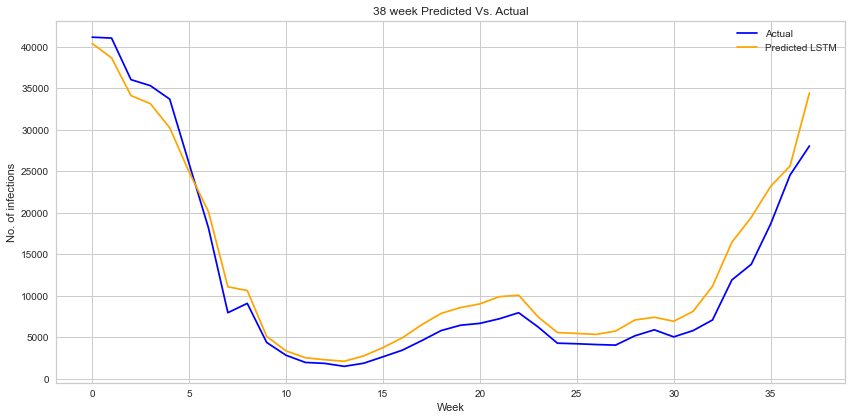

In [51]:
fig, ax = plt.subplots(figsize = (12, 6))
# creating the bar plot
ax.plot(testing_data_39[:-2]*Y_sd_2+Y_mu_2, label='Actual', color ='blue')
ax.plot(y_predict_39*Y_sd_2+Y_mu_2,label='Predicted LSTM', color ='orange')
ax.set_xlabel("Week")
ax.set_ylabel("No. of infections")
ax.set_title("38 week Predicted Vs. Actual")
ax.legend()
fig.tight_layout()
plt.show()  

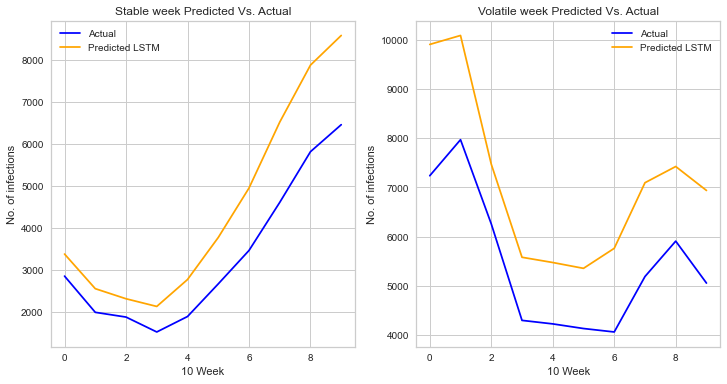

In [52]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))
# creating the bar plot
ax[0].plot(testing_data_39[10:20]*Y_sd_2+Y_mu_2, color ='blue',label='Actual')
ax[0].plot(y_predict_39[10:20]*Y_sd_2+Y_mu_2,color ='orange', label='Predicted LSTM')
ax[0].set_xlabel("10 Week")
ax[0].set_ylabel("No. of infections")
ax[0].set_title("Stable week Predicted Vs. Actual")
ax[0].legend()
ax[1].plot(testing_data_39[21:31]*Y_sd_2+Y_mu_2, label='Actual', color ='blue')
ax[1].plot(y_predict_39[21:31]*Y_sd_2+Y_mu_2,label='Predicted LSTM', color ='orange')
ax[1].set_xlabel("10 Week")
ax[1].set_ylabel("No. of infections")
ax[1].set_title("Volatile week Predicted Vs. Actual")
ax[1].legend()
  

<AxesSubplot:>

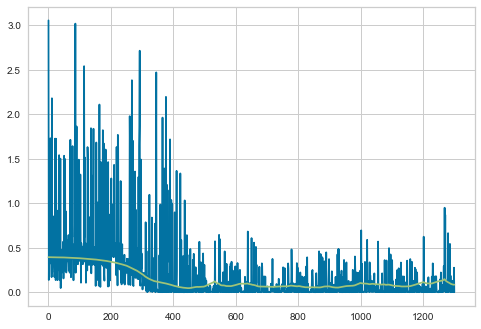

In [54]:
history_pd = pd.DataFrame(history.history)
history_pd['loss'].plot()
history_pd['val_loss'].plot()